<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png" alt="USA" width=700>

# Regresion Logistica

In [3]:
import pandas as pd
import zipfile
with zipfile.ZipFile('data/glass.csv.zip', 'r') as z:
    f = z.open('glass.csv')
    glass = pd.read_csv(f, sep=',', index_col=0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1



# Predecir una respuesta categórica

In [9]:
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [10]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


Text(0, 0.5, 'household')

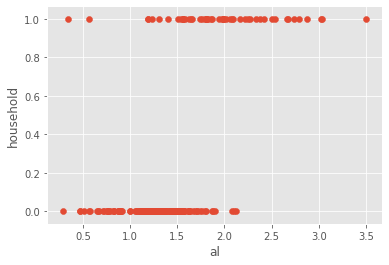

In [11]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Con una linea de regresion:

In [14]:
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

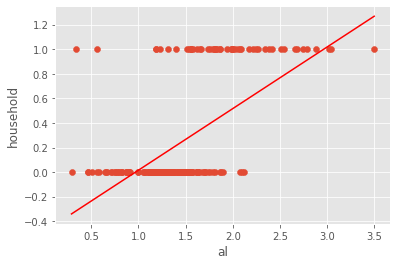

In [15]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

Si **al = 3**, ¿qué clase predecimos para el hogar? **1**

Si **al = 1,5**, ¿qué clase predecimos para el hogar? **0**

Predecimos la clase 0 para valores **más bajos** de al, y la clase 1 para valores **más altos** de al. ¿Cuál es nuestro valor de corte? Alrededor de **al = 2**, porque ahí es donde la línea de regresión lineal cruza el punto medio entre la clase de predicción 0 y la clase 1.

Por lo tanto, diremos que si **hogar_pred> = 0.5**, predecimos una clase de **1**, de lo contrario predecimos una clase de **0**.

## $$ h_ \beta (x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $$

- $ h_ \beta (x) $ es la respuesta
- $ \beta_0 $ es la intersección
- $ \beta_1 $ es el coeficiente de $ x_1 $ (la primera característica)
- $ \beta_n $ es el coeficiente de $ x_n $ (la enésima característica)

### si $ h_ \beta (x) \le 0.5 $ entonces $ \hat y = 0 $

### si $ h_ \beta (x)> 0.5 $ entonces $ \hat y = 1 $

In [16]:
import numpy as np
nums = np.array([5, 15, 8])

np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [17]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0, 0.5, 'household')

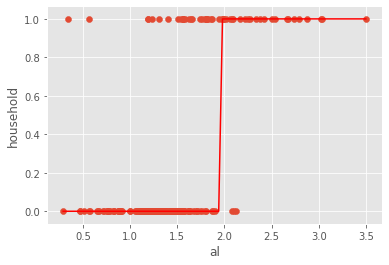

In [18]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')


$ h_\beta (x) $ puede ser menor 0 o mayor que 1, lo cual es contra intuitivo

## Usando regresión logística en su lugar

La regresión logística puede hacer lo que acabamos de hacer:

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

Text(0, 0.5, 'household')

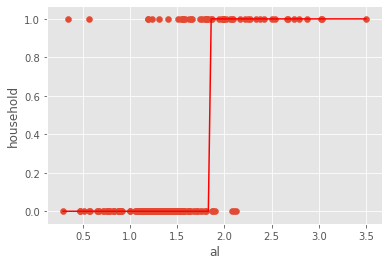

In [20]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')


¿Qué pasaría si quisiéramos las **probabilidades pronosticadas** en lugar de solo las **predicciones de clase**, para comprender qué tan seguros estamos de una predicción determinada?

In [21]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

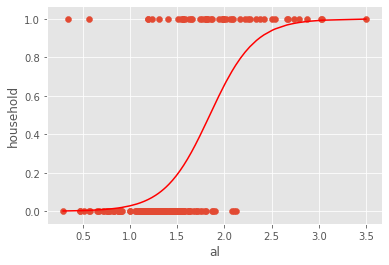

In [22]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Probabilidad, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$


Ejemplos:

- Lanzamiento de dados de 1: probabilidad = 1/6, probabilidades = 1/5
- Tirada de dados pares: probabilidad = 3/6, probabilidades = 3/3 = 1
- Lanzamiento de dados menor que 5: probabilidad = 4/6, probabilidades = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [24]:
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


 
## ¿Qué es la regresión logística?


**Regresión lineal:** la respuesta continua se modela como una combinación lineal de las características:

$$y = \beta_0 + \beta_1x$$


**Regresión logística:** log-odds de que una respuesta categórica sea "verdadera" (1) se modela como una combinación lineal de las características:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

**funcion logit**.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$


La ecuación se puede reorganizar en la **función logística**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

En otras palabras:

- La regresión logística genera las **probabilidades de una clase específica**
- Esas probabilidades se pueden convertir en **predicciones de clase**

La **función logística** tiene algunas propiedades interesantes:

- Toma forma de "s"
- La salida está limitada por 0 y 1

Hemos cubierto cómo funciona esto para ** problemas de clasificación binaria ** (dos clases de respuesta). Pero, ¿qué pasa con los **problemas de clasificación de clases múltiples** (más de dos clases de respuesta)?

- La solución más común para los modelos de clasificación es **"uno contra todos"** (también conocido como **"uno contra el resto"**): descomponga el problema en varios problemas de clasificación binaria
- **La regresión logística multinomial** puede resolver esto como un solo problema

## Part 6: Interpretación de coeficientes de regresión logística

Text(0, 0.5, 'household')

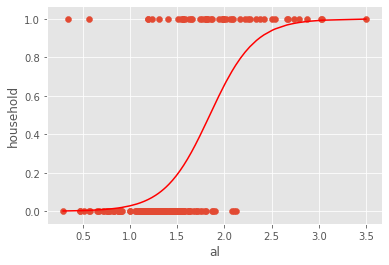

In [25]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [26]:
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.64722717])

In [27]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([1.91023671])

In [28]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.65638534])

**En pocas palabras:** Los coeficientes positivos aumentan las probabilidades logarítmicas de la respuesta (y por lo tanto aumentan la probabilidad) y los coeficientes negativos disminuyen las probabilidades logarítmicas de la respuesta (y por lo tanto disminuyen la probabilidad).

In [30]:
# examine the intercept
logreg.intercept_

array([-7.71359965])

**Interpretación:** Para un valor de 'al' de 0, la probabilidad logarítmica de 'hogar' es -7,71.

In [32]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00044651])

![Logistic regression beta values](img/logistic_betas.png)


Cambiar el valor $ \beta_0 $ desplaza la curva **horizontalmente**, mientras que cambiar el valor $ \beta_1 $ cambia la **pendiente** de la curva.

## Comparación de regresión logística con otros modelos

Ventajas de la regresión logística:

- Altamente interpretable (si recuerda cómo)
- El entrenamiento y la predicción de modelos son rápidos
- No se requiere ajuste (excluyendo regularización)
- Las funciones no necesitan escala
- Puede funcionar bien con una pequeña cantidad de observaciones.
- Produce probabilidades pronosticadas bien calibradas

Desventajas de la regresión logística:

- Supone una relación lineal entre las características y las probabilidades logarítmicas de la respuesta
- El rendimiento (generalmente) no es competitivo con los mejores métodos de aprendizaje supervisado
- No se pueden aprender automáticamente las interacciones de las funciones